In [1]:
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats


In [4]:
#define the file to extract data
eval_files = [
    ('baseline', '../evalbaseline/results.txt'),
    ('baseline_with_history', '../evalbaseline/results_with_history.txt'),
    ('history-summary', '../evalbaseline/run_with_history_summarization_prompt_only'),
    ('ensembling', '../evalbaseline/run_with_rephrasing_prompt_only'),
    ('both-augmentations','../evalbaseline/run_with_history_summary_and_rephrasing_prompt')
]
# metrics = ['ragas_score', 'context_relevancy', 'context_recall', 'answer_similarity', 'answer_relevancy', 'faithfulness', 'semantic_similarity']
metrics = ['answer_relevancy', 'faithfulness', 'semantic_similarity']

results = {}
for eval_name, eval_file in eval_files:
    #Open the file
    with open(eval_file, 'r') as file:
        lines = file.readlines()
    #filter lines to get those that contain Scores
    score_lines = [line for line in lines if 'Score=' in line]
    scores = {key : [] for key in metrics}
    for line in score_lines:
        try:
            score_part = re.search(r"Score=(.*)", line).group(1)
            score_dict = json.loads(score_part.replace("'", "\""))
            for key in scores:
                if key in score_dict:
                    scores[key].append(score_dict[key])
        except Exception:
            print('exception caught when processing line: ', line, 'for eval_name: ', eval_name)
    results[eval_name] = scores


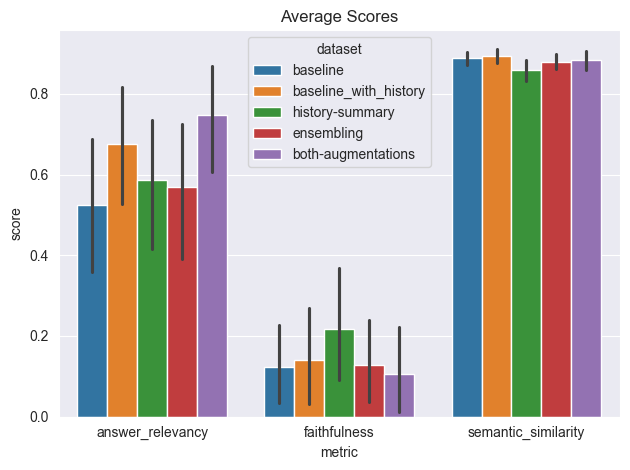

In [6]:
df = pd.DataFrame(results).T

data_frame_prep = []
for metric in df:
    metric_data = df[metric]
    for dataset, data in metric_data.items():
        # mean = float('nan')
        # median = float('nan')
        # trunc_mean = float('nan')
        # if len(data) != 0:
        #     mean = np.mean(data)
        #     median = np.median(data)
        #     trunc_mean = stats.trim_mean(data, proportiontocut=0.1)
        # data_frame_prep.append([score, dataset, mean, median, trunc_mean])
        for score in data:
            data_frame_prep.append([metric, dataset, score])
# df = pd.DataFrame(data_frame_prep, columns=['metric', 'dataset', 'mean', 'median', 'trunc_mean'])
df = pd.DataFrame(data_frame_prep, columns=['metric', 'dataset', 'score'])

# df
# sns.barplot(x='metric', y='trunc_mean', hue='dataset', data=df)
sns.barplot(x='metric', y='score', hue='dataset', data=df).set_title('Average Scores')
plt.tight_layout()
plt.show()


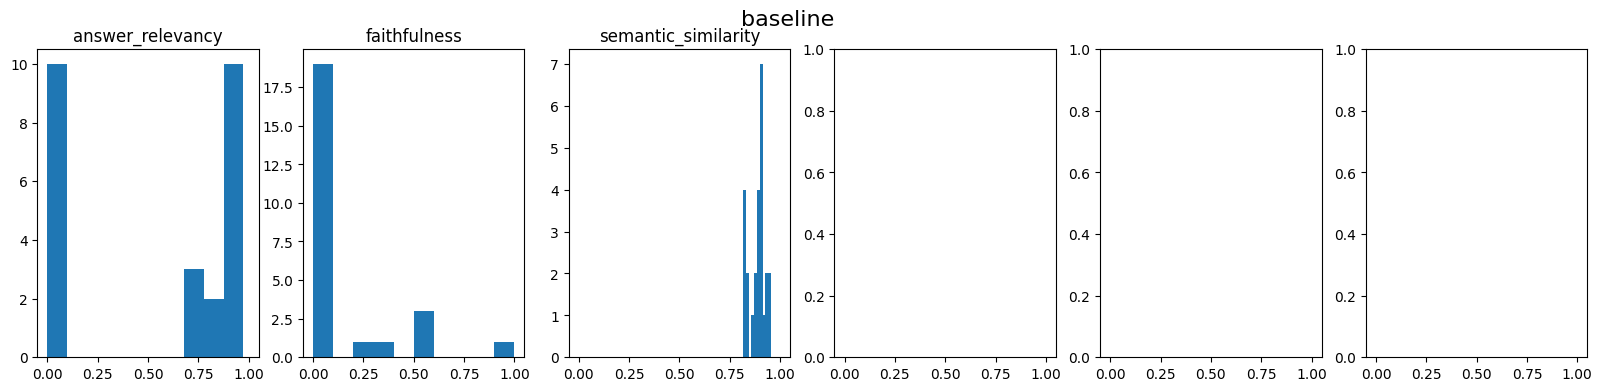

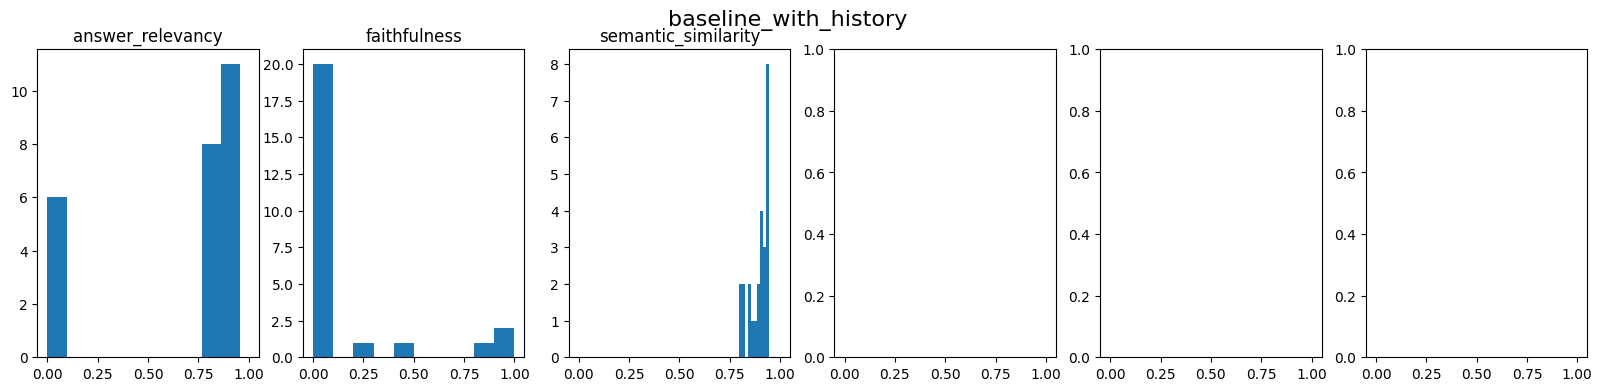

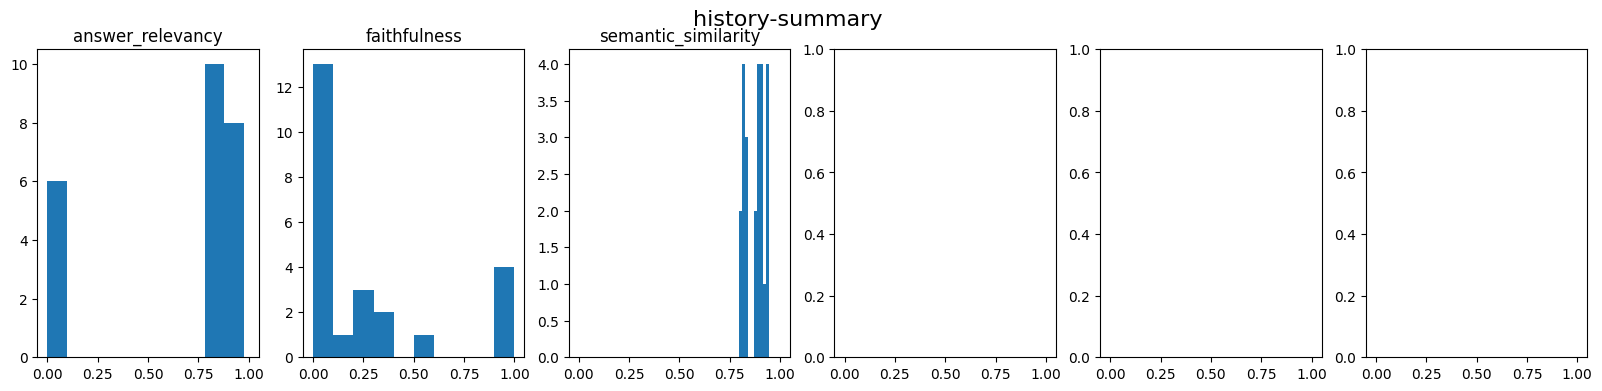

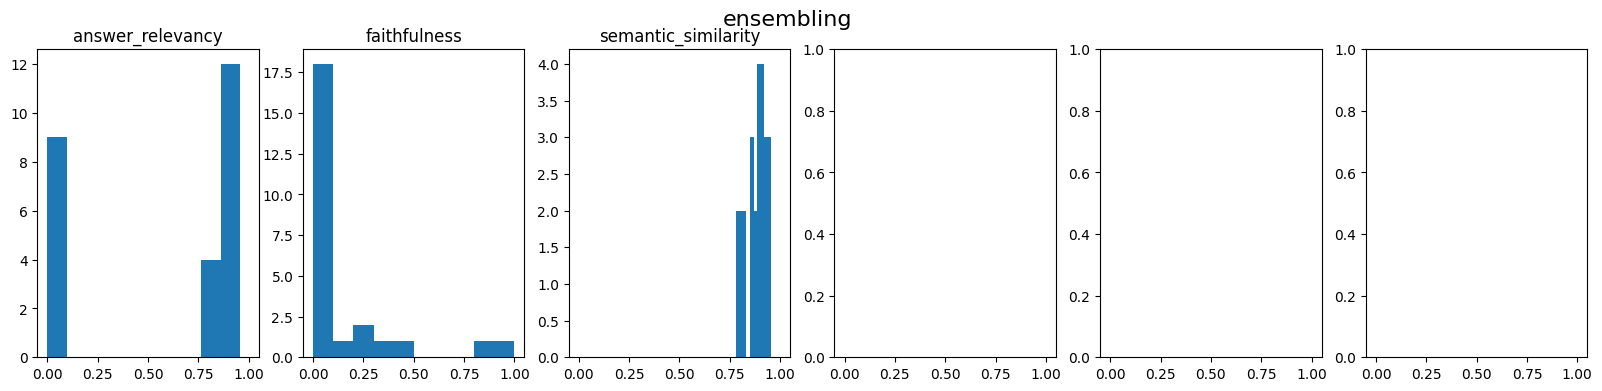

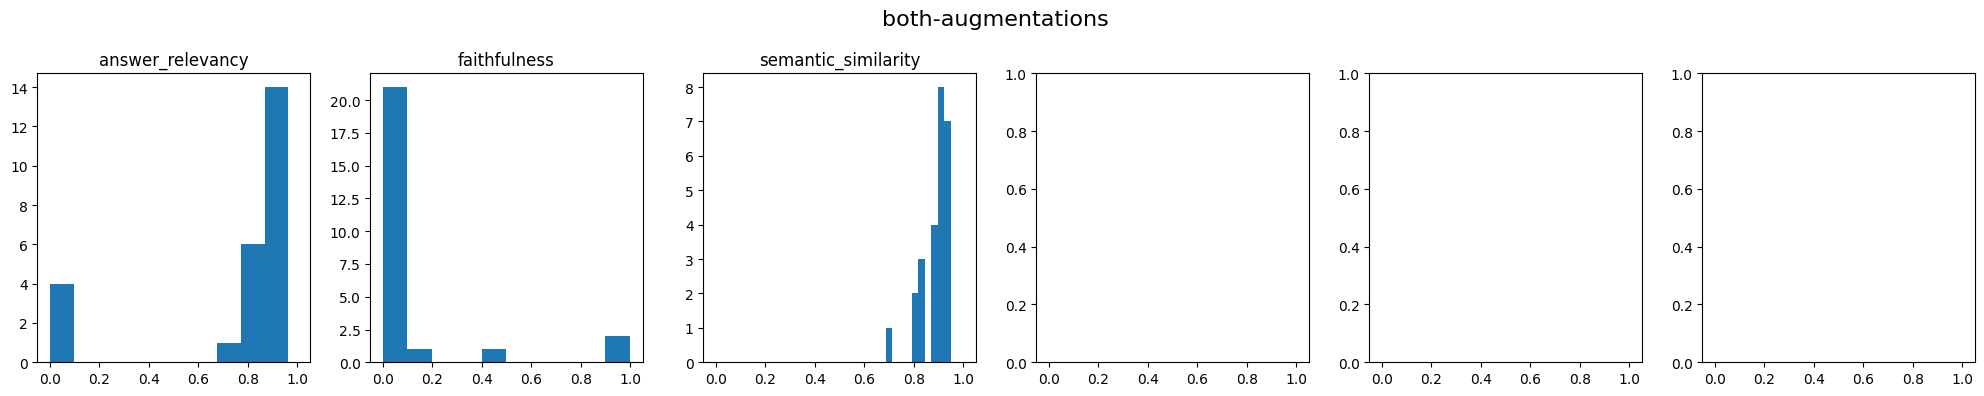

In [162]:
for eval_name, scores in results.items():
    fig, axs = plt.subplots(1, 6, figsize=(20, 4), sharex=True)
    for i, key in enumerate(scores):
        axs[i].hist(scores[key])
        axs[i].set_title(key)
    fig.suptitle(eval_name, fontsize=16)
plt.tight_layout()

In [78]:

import re
import ast
import pandas as pd
import matplotlib.pyplot as plt

# List of files
eval_files = [
    ('baseline', '../evalbaseline/results.txt'),
    ('baseline_with_history', '../evalbaseline/results_with_history.txt'),
    ('history-summary', '../evalbaseline/run_with_history_summarization_prompt_only'),
    ('ensembling', '../evalbaseline/run_with_rephrasing_prompt_only'),
    ('both-augmentations','../evalbaseline/run_with_history_summary_and_rephrasing_prompt')
]




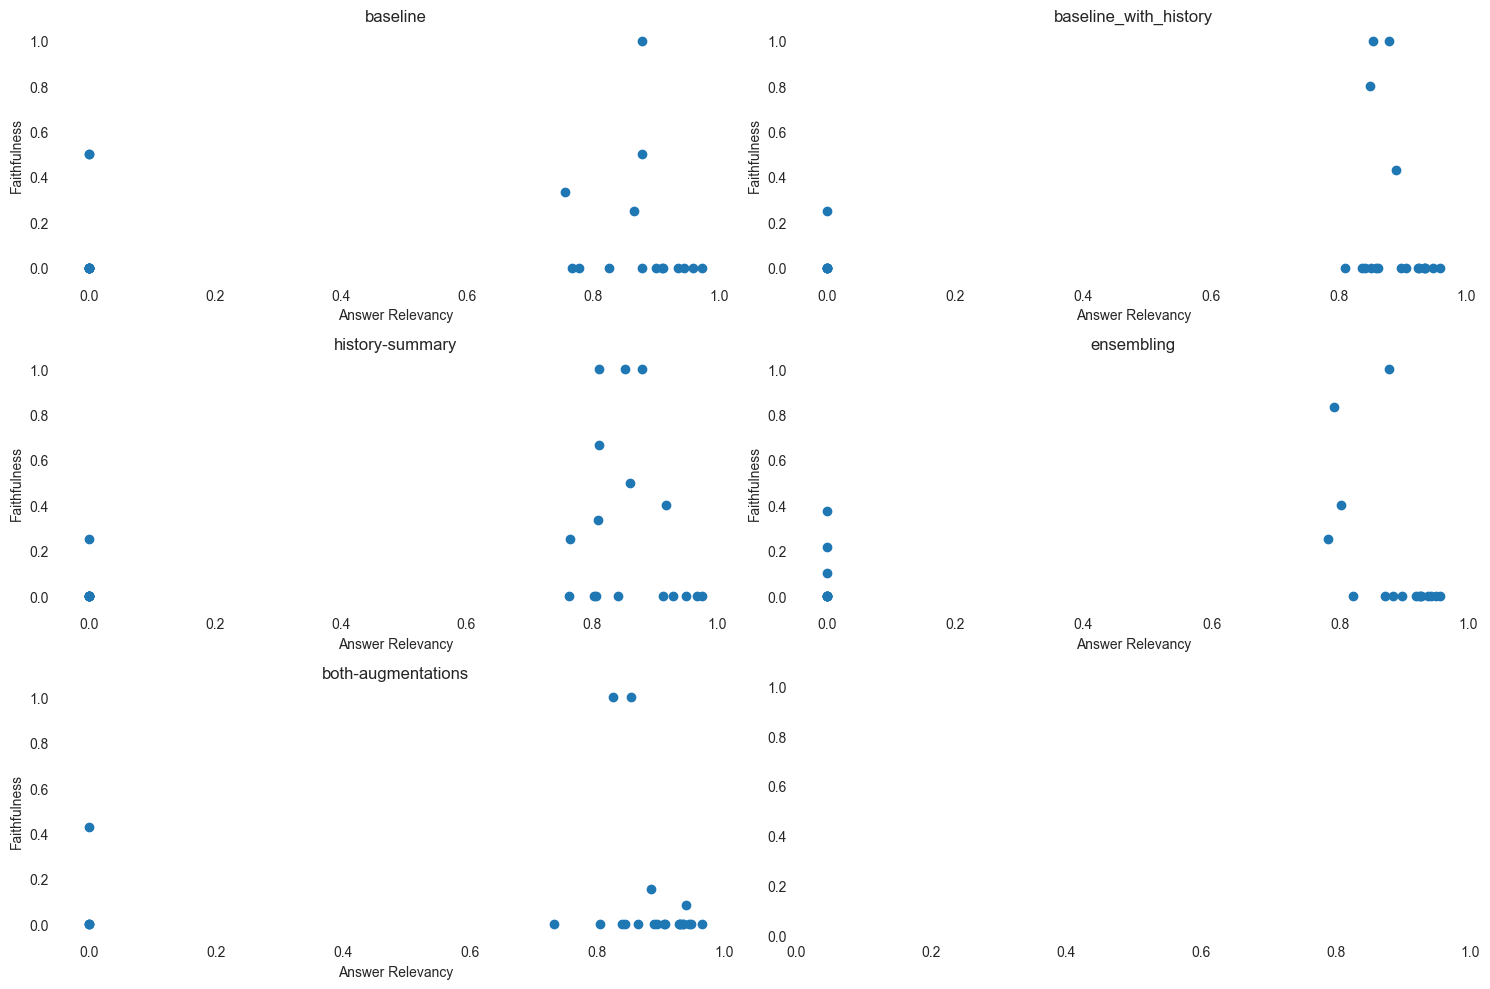

In [79]:
##################
# faithfulness vs answer_relevancy
# in one graph
#################
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Loop through each file and plot
for i, (name, file_path) in enumerate(eval_files):
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Use regex to find the line containing the "Score" dictionary
    pattern = r"Score=\{.*?\}"
    score_list = re.findall(pattern, content)

    # Extract dictionaries from strings
    score_dicts = [ast.literal_eval(item.split('=')[1]) for item in score_list]

    # Create DataFrame
    df = pd.DataFrame(score_dicts)

    # Rename columns if needed
    df.columns = ['answer_relevancy', 'semantic_similarity', 'faithfulness']

    # Add a new column for the ratio
    df['ratio'] = df.apply(lambda row: row['faithfulness'] / row['answer_relevancy'] if row['answer_relevancy'] != 0 else None, axis=1)

    # Create a scatter plot
    axes[i].scatter(df['answer_relevancy'], df['faithfulness'], label=name, marker='o')
    axes[i].set_title(name)
    axes[i].set_xlabel('Answer Relevancy')
    axes[i].set_ylabel('Faithfulness')

# Adjust layout
plt.tight_layout()

# Set the background color to white
fig.patch.set_facecolor('white')
for ax in axes:
    ax.set_facecolor('white')

# Save the plot with a white background
plt.savefig('scatter_plot.png', facecolor='white', edgecolor='black', bbox_inches='tight')

# Show the plot
plt.show()


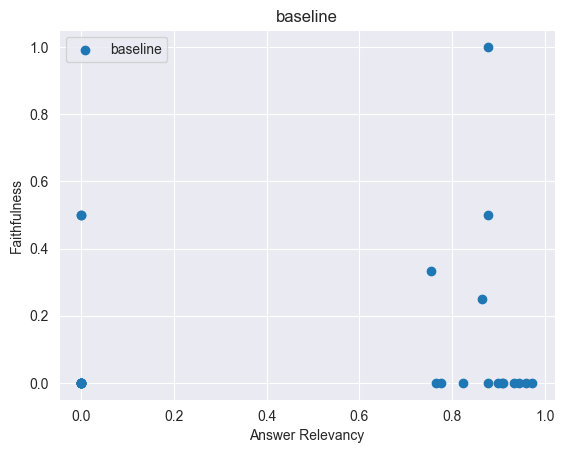

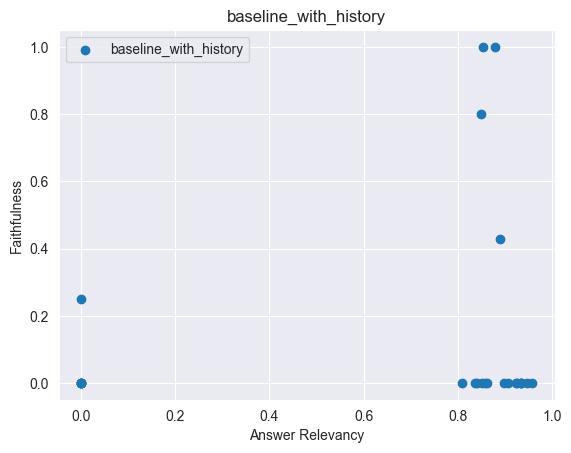

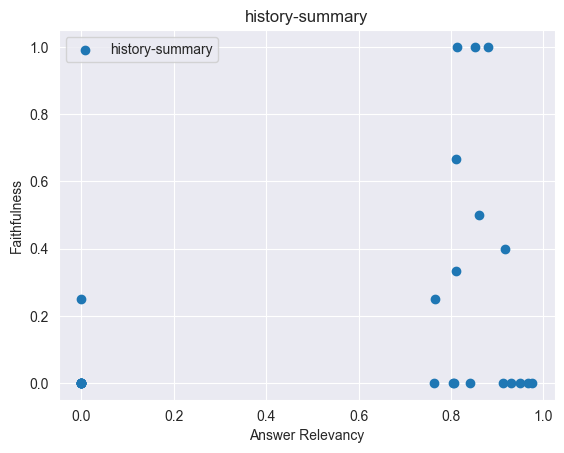

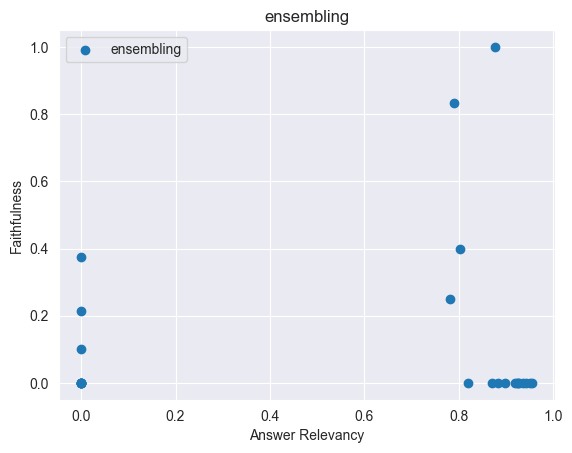

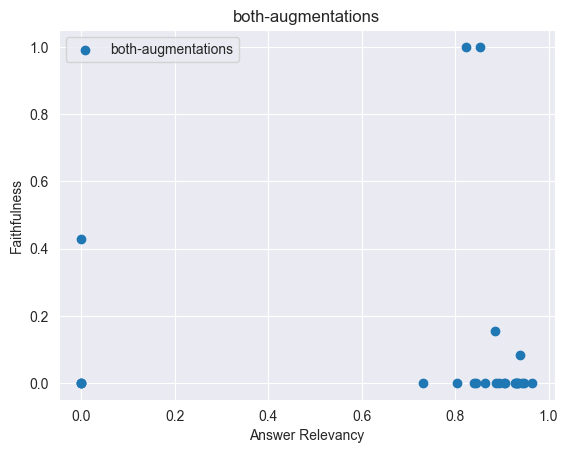

In [80]:
##################
# faithfulness vs answer_relevancy
# in separate graphs
#################

# Loop through each file and plot
for name, file_path in eval_files:
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Use regex to find the line containing the "Score" dictionary
    pattern = r"Score=\{.*?\}"
    score_list = re.findall(pattern, content)

    # Extract dictionaries from strings
    score_dicts = [ast.literal_eval(item.split('=')[1]) for item in score_list]

    # Create DataFrame
    df = pd.DataFrame(score_dicts)

    # Rename columns if needed
    df.columns = ['answer_relevancy', 'semantic_similarity', 'faithfulness']

    # Add a new column for the ratio
    df['ratio'] = df.apply(lambda row: row['faithfulness'] / row['answer_relevancy'] if row['answer_relevancy'] != 0 else None, axis=1)

    # Create a scatter plot
    plt.figure()
    plt.scatter(df['answer_relevancy'], df['faithfulness'], label=name, marker='o')
    plt.title(name)
    plt.xlabel('Answer Relevancy')
    plt.ylabel('Faithfulness')
    plt.legend()

    # Save the plot with a white background and borders
    plt.savefig(f'{name}_scatter_plot.png', facecolor='white', edgecolor='black', bbox_inches='tight')

    # Show the plot (optional)
    # plt.show()


In [81]:
######################
# Summarize statistics
######################

# Initialize an empty DataFrame to store all descriptive statistics
all_stats = pd.DataFrame()

# Loop through each file and generate descriptive statistics
for name, file_path in eval_files:
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Use regex to find the line containing the "Score" dictionary
    pattern = r"Score=\{.*?\}"
    score_list = re.findall(pattern, content)

    # Extract dictionaries from strings
    score_dicts = [ast.literal_eval(item.split('=')[1]) for item in score_list]

    # Create DataFrame
    df = pd.DataFrame(score_dicts)

    # Rename columns if needed
    df.columns = ['answer_relevancy', 'semantic_similarity', 'faithfulness']

    # Add a new column for the ratio
    df['ratio'] = df.apply(lambda row: row['faithfulness'] / row['answer_relevancy'] if row['answer_relevancy'] != 0 else None, axis=1)

    # Generate descriptive statistics
    stats = df.describe()

    # Add a column to identify the dataset
    stats['dataset'] = name

    # Append the statistics to the all_stats DataFrame
    all_stats = pd.concat([all_stats, stats])

# Save the merged descriptive statistics to a CSV file
all_stats.to_csv('merged_descriptive_statistics.csv')

# Print the merged descriptive statistics (optional)
print('Merged Descriptive Statistics:')
all_stats


Merged Descriptive Statistics:


,answer_relevancy,semantic_similarity,faithfulness,ratio,dataset
count,25.000000,25.000000,25.000000,15.000000,baseline
mean,0.525744,0.888064,0.123332,0.162747,baseline
std,0.441258,0.041266,0.253584,0.328083,baseline
min,0.000000,0.814700,0.000000,0.000000,baseline
25%,0.000000,0.860300,0.000000,0.000000,baseline
50%,0.776700,0.899000,0.000000,0.000000,baseline
75%,0.899000,0.911800,0.000000,0.144559,baseline
max,0.972500,0.955400,1.000000,1.140511,baseline
count,25.000000,25.000000,25.000000,19.000000,baseline_with_history
mean,0.675880,0.894348,0.139144,0.196340,baseline_with_history
